In [1]:
## Import Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'OnlineRetail.csv')
Cust_df = pd.read_csv(r'CustomerData.csv')

print("No of rows:", len(df))
print("No of customers:", len(Cust_df))
df.head(2)

No of rows: 942334
No of customers: 8762


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [3]:
Cust_df.head(2)

,CustomerID,State,Age,Gender,Country
0,13085,England,54,Male,United Kingdom
1,13078,Wales,40,Female,United Kingdom


In [4]:
def summary_statistics(df):
    numerical_summary = df.describe()
    categorical_summary = df.describe(include=['object', 'category'])
    return numerical_summary, categorical_summary

# Generate summary statistics for both datasets
customer_data_summary = summary_statistics(Cust_df)
online_retail_data_summary = summary_statistics(df)

In [5]:
customer_data_summary

(               Age
 count  8762.000000
 mean     40.027505
 std      13.722129
 min      18.000000
 25%      30.000000
 50%      40.000000
 75%      50.000000
 max      70.000000,
        CustomerID    State  Gender         Country
 count        8762     8762    8762            8762
 unique       8762        4       3               1
 top         13085  England  Female  United Kingdom
 freq            1     7406    4329            8762)

In [6]:
online_retail_data_summary

(            Quantity          Price
 count  942334.000000  942334.000000
 mean       10.125910       4.859276
 std       168.038673     125.927035
 min         1.000000       0.001000
 25%         1.000000       1.250000
 50%         3.000000       2.100000
 75%        10.000000       4.150000
 max     80995.000000   53594.360000,
        Invoice StockCode                         Description  \
 count   942334    942334                              942334   
 unique   43855      4921                                5385   
 top     573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
 freq      1114      5433                                5523   
 
                 InvoiceDate Customer ID         Country  
 count                942334      942334          942334  
 unique                40485        8762               1  
 top     2011-10-31 14:41:00       17841  United Kingdom  
 freq                   1114       12638          942334  )

In [7]:
Test = df.groupby(['StockCode'])['Description'].nunique().reset_index()
Test[Test['Description'] > 1]

,StockCode,Description
29,15058A,2
30,15058B,2
37,16011,2
38,16012,2
57,16151A,2
...,...,...
4505,90014B,2
4506,90014C,2
4845,90208,2
4881,ADJUST,3


In [8]:
df[df['StockCode'] == '15058A']['Description'].value_counts()

BLUE POLKADOT GARDEN PARASOL       84
BLUE WHITE SPOTS GARDEN PARASOL    58
Name: Description, dtype: int64

In [9]:
##### Based on summary stats we cleaned the description column as 1 stock code has 1 description

def clean_descriptions_with_max_counts(df):
    # Get the most frequent description for each stock code
    most_frequent_descriptions = df.groupby('StockCode')['Description'].agg(lambda x: x.value_counts().idxmax())
    
    # Map the most frequent description to the dataframe
    df['Description'] = df['StockCode'].map(most_frequent_descriptions)
    
    return df

# Apply the function to clean the descriptions
df = clean_descriptions_with_max_counts(df)

df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [10]:
#### Summary for the online_retail data
online_retail_data_summary = summary_statistics(df)
online_retail_data_summary

(            Quantity          Price
 count  942334.000000  942334.000000
 mean       10.125910       4.859276
 std       168.038673     125.927035
 min         1.000000       0.001000
 25%         1.000000       1.250000
 50%         3.000000       2.100000
 75%        10.000000       4.150000
 max     80995.000000   53594.360000,
        Invoice StockCode                         Description  \
 count   942334    942334                              942334   
 unique   43855      4921                                4734   
 top     573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
 freq      1114      5433                                5532   
 
                 InvoiceDate Customer ID         Country  
 count                942334      942334          942334  
 unique                40485        8762               1  
 top     2011-10-31 14:41:00       17841  United Kingdom  
 freq                   1114       12638          942334  )

In [11]:
customer_data_summary

(               Age
 count  8762.000000
 mean     40.027505
 std      13.722129
 min      18.000000
 25%      30.000000
 50%      40.000000
 75%      50.000000
 max      70.000000,
        CustomerID    State  Gender         Country
 count        8762     8762    8762            8762
 unique       8762        4       3               1
 top         13085  England  Female  United Kingdom
 freq            1     7406    4329            8762)

#### Summary Stats

1. High Variability in Purchase Quantities: The quantity of items purchased per transaction varies widely, indicating diverse buying behaviors among customers.

2. Significant Price Range: Item prices range from very low to extremely high, suggesting the catalog includes a wide variety of products catering to different customer segments.

3. Diverse Customer Age Range: The average customer age is around 40, with a range from 18 to 70, showing the store attracts customers across different age groups.

In [12]:
df['Price'].value_counts()

1.25      92030
1.65      63712
0.85      59662
2.95      57397
0.42      39773
          ...  
57.49         1
55.11         1
40.13         1
44.98         1
224.69        1
Name: Price, Length: 2649, dtype: int64

## Univariate Analysis

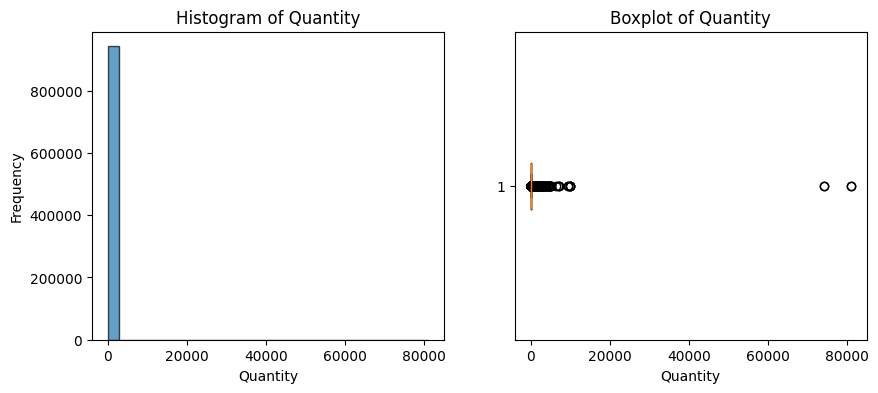

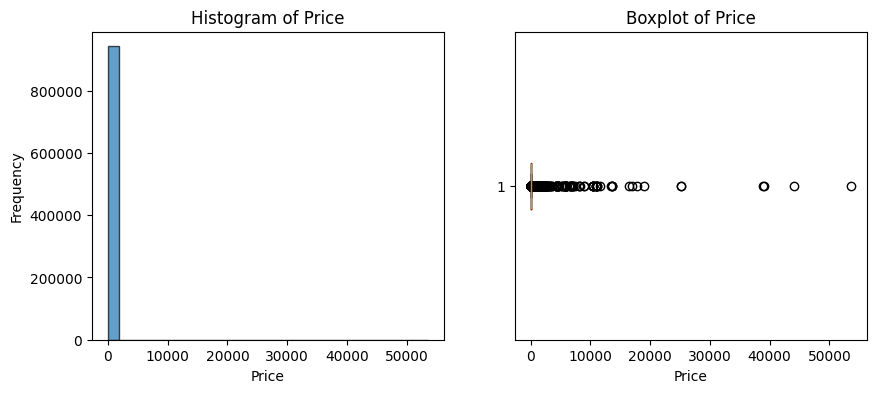

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def univariate_analysis(df, columns):
    for col in columns:
        if col in df.columns:
            # Check if the column is numerical
            if np.issubdtype(df[col].dtype, np.number):
                finite_values = df[col].dropna()
                if finite_values.apply(np.isfinite).all():
                    plt.figure(figsize=(10, 4))
                    
                    plt.subplot(1, 2, 1)
                    plt.hist(finite_values, bins=30, edgecolor='k', alpha=0.7)
                    plt.title(f'Histogram of {col}')
                    plt.xlabel(col)
                    plt.ylabel('Frequency')
                    
                    plt.subplot(1, 2, 2)
                    plt.boxplot(finite_values, vert=False)
                    plt.title(f'Boxplot of {col}')
                    plt.xlabel(col)
                    
                    plt.show()
                else:
                    print(f"Skipping column {col} due to non-finite values.")
            else:
                # Categorical columns
                non_null_values = df[col].dropna()
                if not non_null_values.empty:
                    plt.figure(figsize=(10, 6))
                    non_null_values.value_counts().plot(kind='barh')
                    plt.title(f'Countplot of {col}')
                    plt.xlabel('Count')
                    plt.ylabel(col)
                    plt.show()
                else:
                    print(f"Skipping column {col} due to null values.")
        else:
            print(f"Column {col} does not exist in the DataFrame.")

# Example usage:
# Specify the columns you want to analyze
columns_to_analyze = ['Quantity', 'Price']  # Replace with your column names
univariate_analysis(df, columns_to_analyze)


Column:  Quantity
lower_bound:  0
upper_bound:  23.5
Removed outliers from Quantity.
Column:  Price
lower_bound:  0
upper_bound:  8.75
Removed outliers from Price.


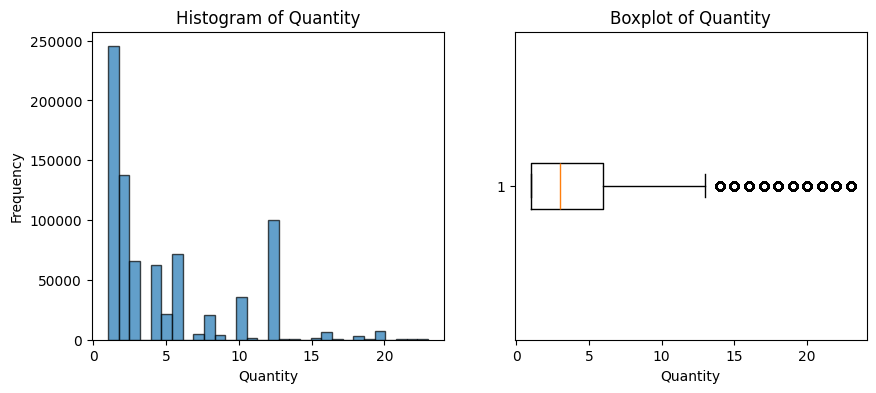

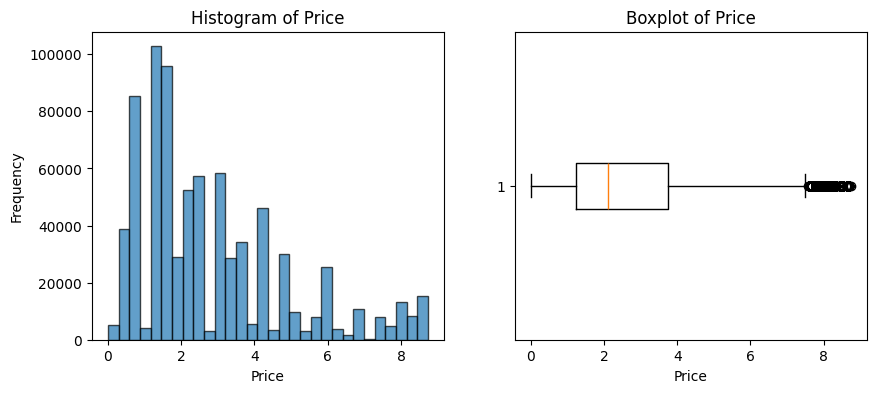

In [14]:
#### Removing the Outliers from the quantity & Price

def remove_outliers(df, columns):
    for col in columns:
        if col in df.columns and np.issubdtype(df[col].dtype, np.number):
            print("Column: ", col)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = max(0, Q1 - 1.5 * IQR)
            upper_bound = Q3 + 1.5 * IQR
            print("lower_bound: ", lower_bound)
            print("upper_bound: ", upper_bound)
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            print(f"Removed outliers from {col}.")
        else:
            print(f"Column {col} is not numerical or does not exist.")
    return df

# Example usage:
columns_to_clean = ['Quantity', 'Price']
df = remove_outliers(df, columns_to_clean)

# Verify the removal of outliers
univariate_analysis(cleaned_data, columns_to_clean)